In [1]:
%matplotlib inline

import sys
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage import exposure, img_as_float, morphology

from osgeo import gdal
import osr
import xml.etree.ElementTree as ET
import fnmatch
from my_packages.My_Geoprocess import*

In [14]:
xml_filePath = "D:/Image/Acolyte/resultEntireSC_NIRSwir2.2/"
xml_fileNameF = "S2A_OPER_MSI_L1C_TL_MPS__20161101T001337_A007105_T58KFA_N02.04_FLAGS.tif"
xml_fileName = "S2A_OPER_MSI_L1C_TL_MPS__20161101T001337_A007105_T58KFA_N02.04_RRS_"
gdal.ErrorReset()
ds = gdal.Open( xml_filePath + xml_fileNameF )
F = ds.GetRasterBand(1).ReadAsArray()
RGBWV = np.array([664,560,497 ])
RGB = np.empty((F.shape[0], F.shape[1], 3 ), dtype=float)
ds = list()

for i, j in enumerate(RGBWV):
    ds.append(gdal.Open( xml_filePath + xml_fileName + str(j) + '.tif' ))
    if ds is None or gdal.GetLastErrorMsg() != '':
        print('xml failed to load')
    else:
        RGB[:,:,i] = ds[i].GetRasterBand(1).ReadAsArray()
        
    
DataSet_md = ds[0].GetMetadata()
GT = ds[0].GetGeoTransform()
SubDataSet_md = ds[0].GetMetadata('SUBDATASETS')
RGB.shape

(10980, 10980, 3)

In [32]:
print(better_contrast)

[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 ..., 
 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


0
1
2


<function matplotlib.pyplot.show>

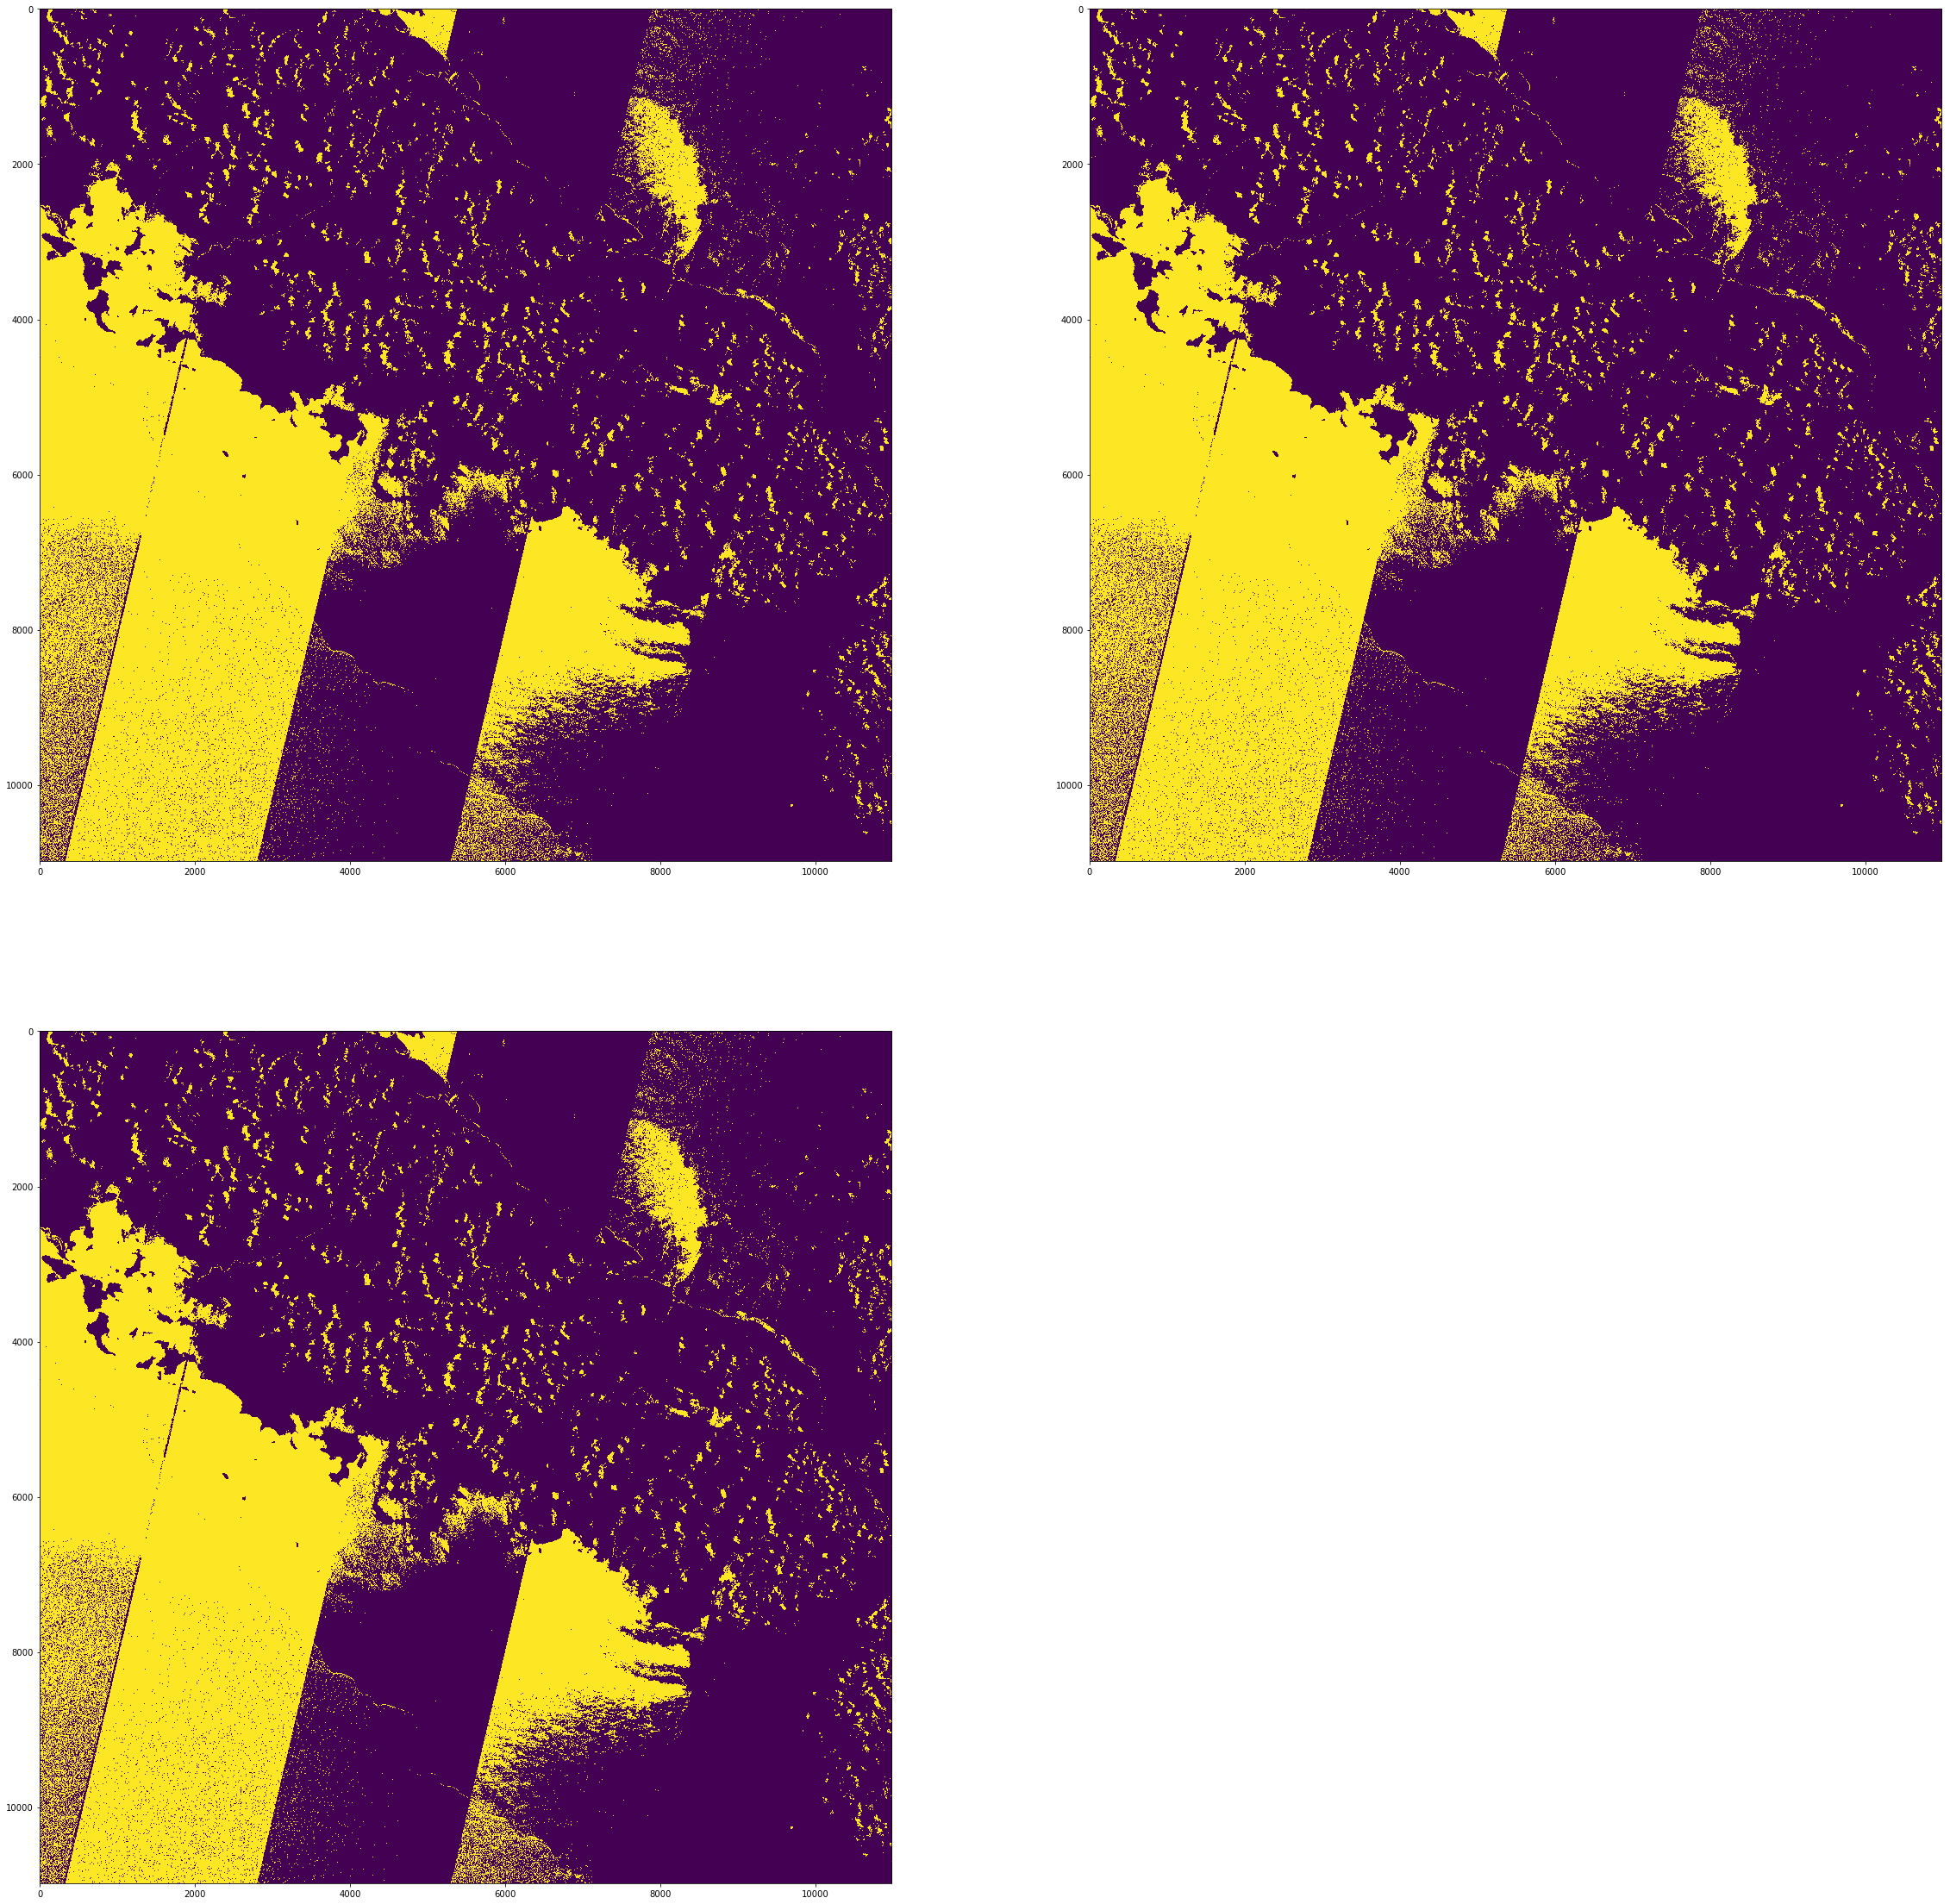

In [24]:
plt.figure(figsize=(40, 40))
for i in range(3):
    print(i)
    plt.subplot(2, 2, i+1)
    plt.imshow(img_as_float(better_contrast[:,:,i]))
plt.show

In [54]:
p_min = 5
p_max = 95
indexTemp = np.full(RGB.shape, False, dtype= bool)
better_contrast = np.full(RGB.shape, np.nan, dtype= float)

for i in range(RGB.shape[2]):
    indexTemp[:,:,i] = np.logical_not(np.isnan(RGB[:,:,i]))
    v_min, v_max = np.percentile(RGB[indexTemp], (p_min, p_max))
    print('percentiles ',p_min,', ',p_max,' of band ',str(i),': ',str(v_min),', ',str(v_max),'\n')
    better_contrast[indexTemp] = exposure.rescale_intensity(RGB[indexTemp], in_range=(v_min, v_max))
    print(better_contrast[indexTemp])
    indexTemp[:,:,i] = False
    
    
print(better_contrast[np.logical_not(np.isnan(RGB[:,:,i]))])


percentiles  5 ,  95  of band  0 :  0.00146700569894 ,  0.0105938697234 

[ 0.25650354  0.11691784  0.38205918 ...,  0.1456881   0.0943749
  0.39618189]
percentiles  5 ,  95  of band  1 :  0.00250978325494 ,  0.0230687409639 

[ 0.4011796   0.26672686  0.35210044 ...,  0.18763648  0.12467348
  0.32816936]
percentiles  5 ,  95  of band  2 :  0.0073429364711 ,  0.0274615306407 

[ 0.08436067  0.04290808  0.19680189 ...,  0.55075405  0.53815625
  0.5909138 ]
[[ 0.25650354  0.4011796   0.08436067]
 [ 0.11691784  0.26672686  0.04290808]
 [ 0.38205918  0.35210044  0.19680189]
 ..., 
 [ 0.1456881   0.18763648  0.55075405]
 [ 0.0943749   0.12467348  0.53815625]
 [ 0.39618189  0.32816936  0.5909138 ]]


In [36]:
i = 1
indexTemp[:,:,i] = np.logical_not(np.isnan(RGB[:,:,i]))
RGB[indexTemp]

array([ 0.01075762,  0.00799341,  0.0097486 , ...,  0.00636739,
        0.00507294,  0.0092566 ])

<function matplotlib.pyplot.show>

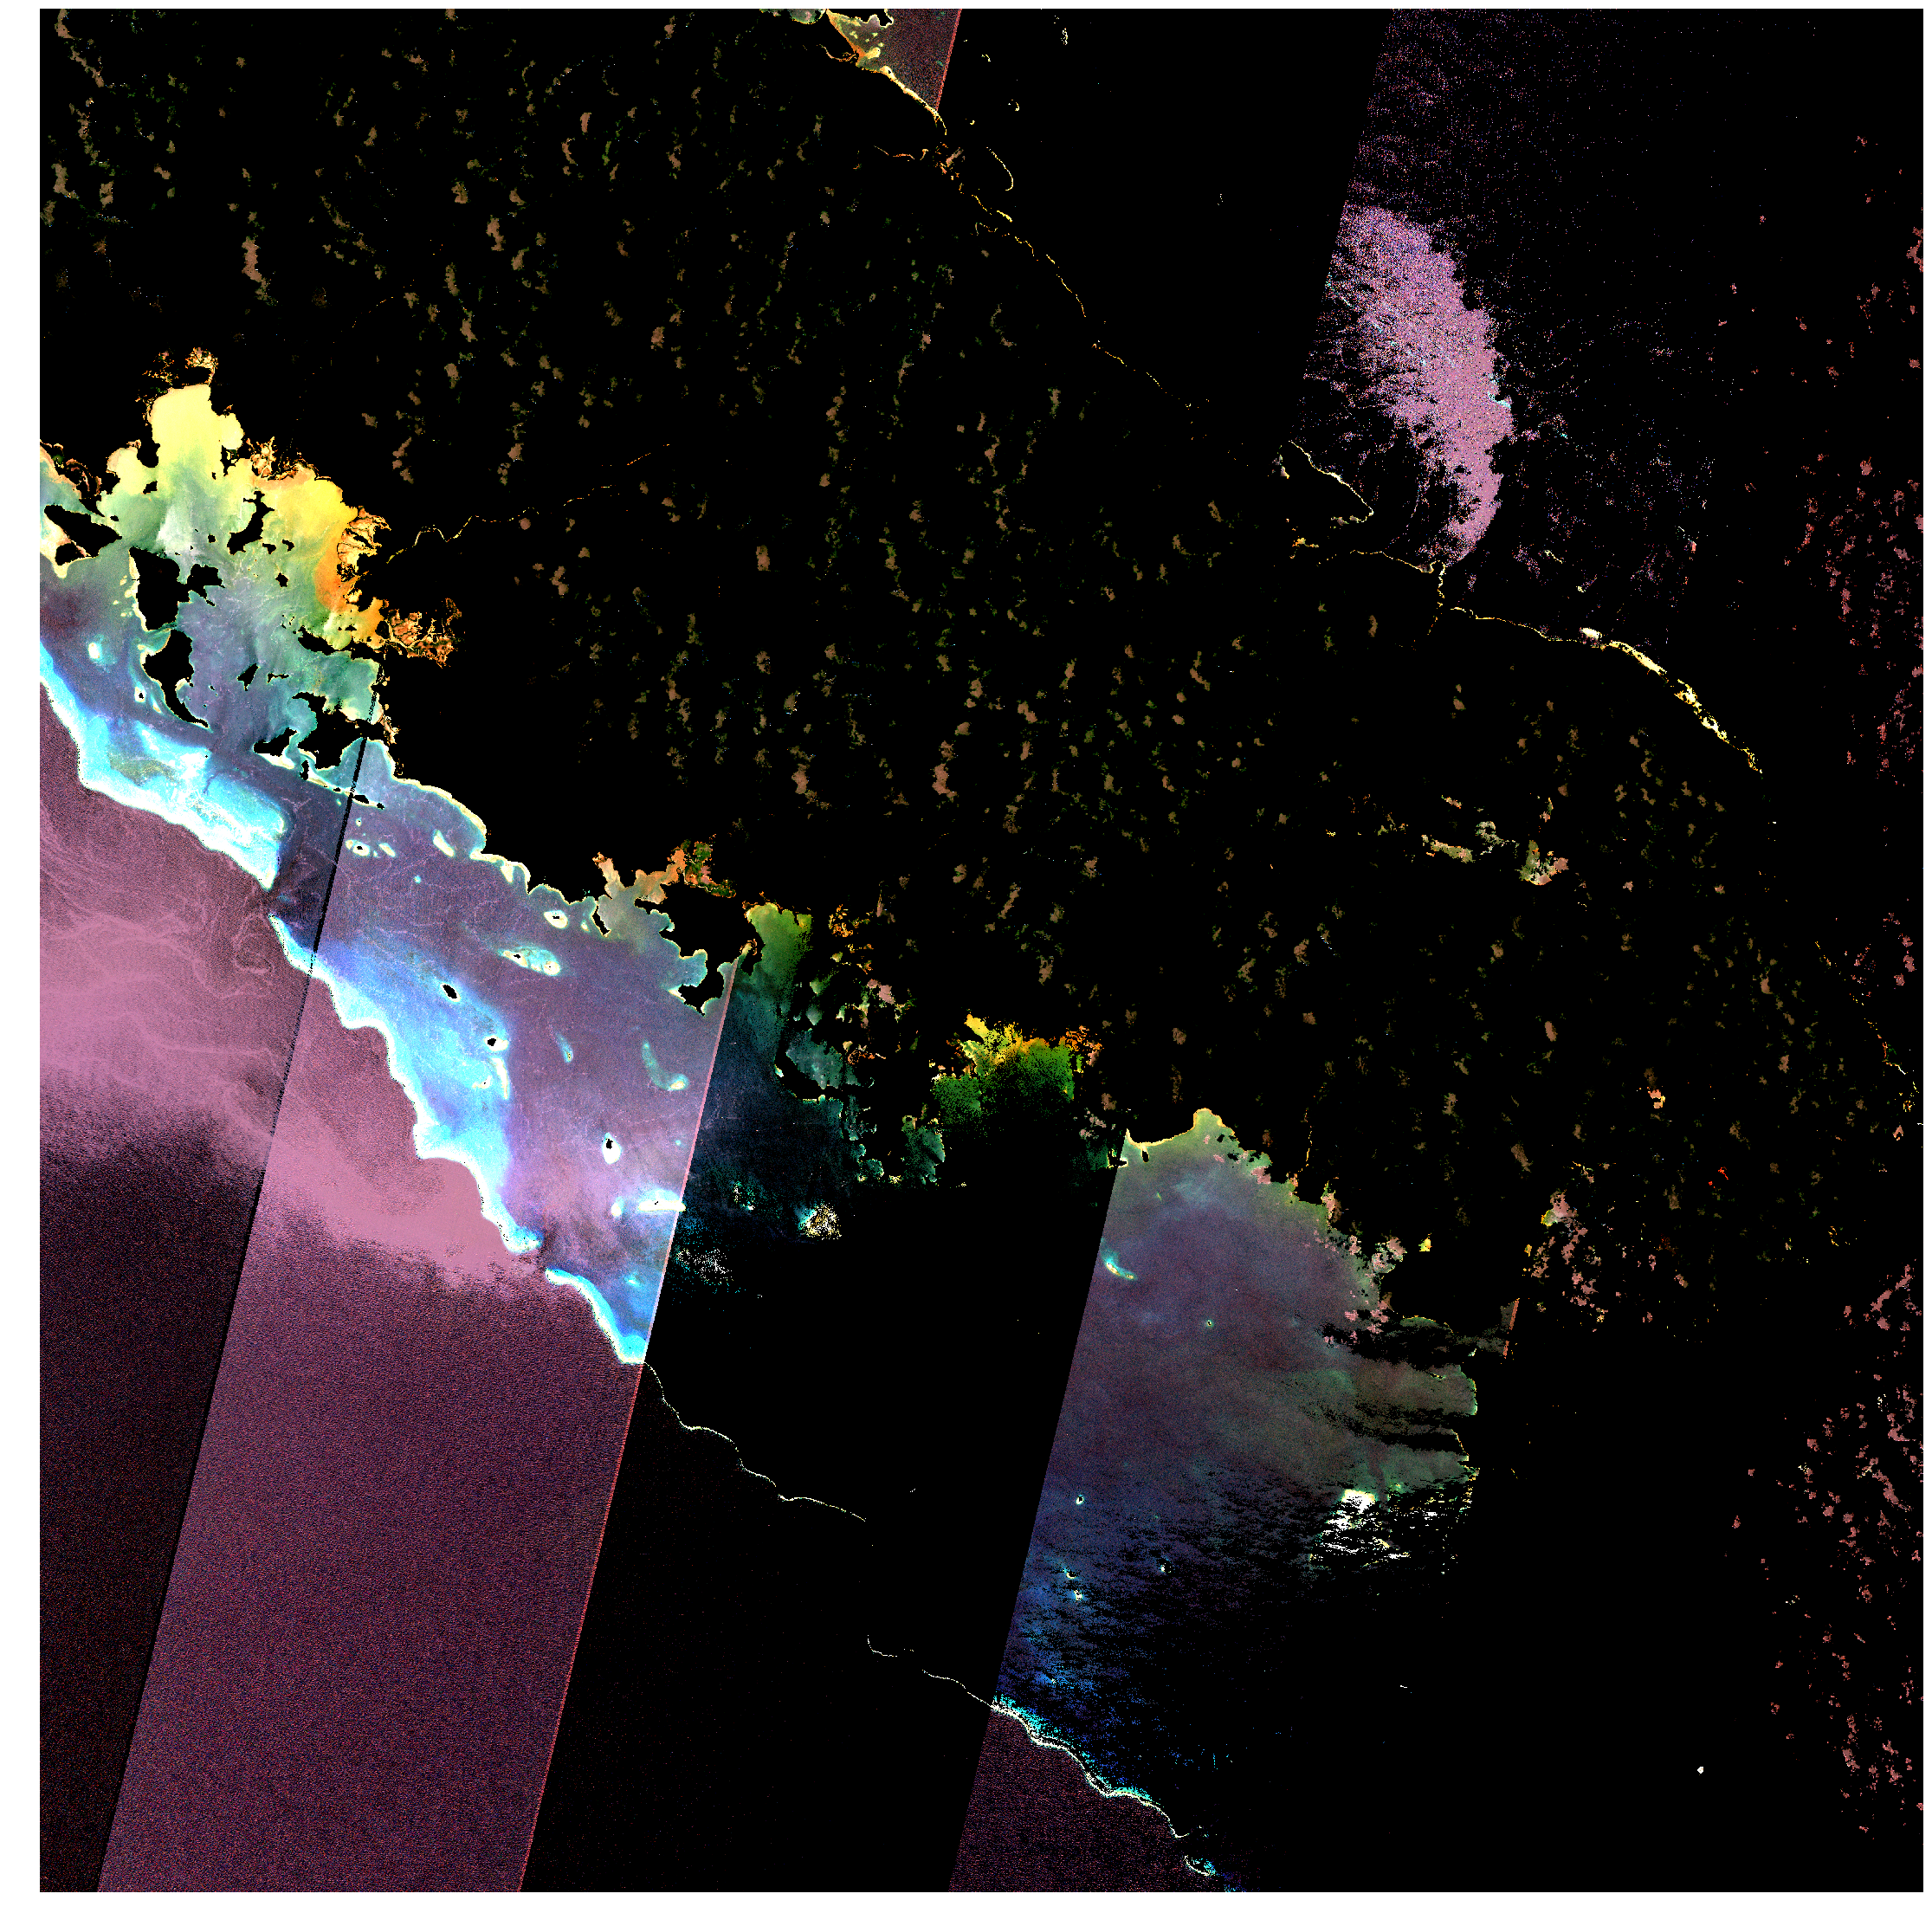

In [55]:

plt.figure(figsize=(40, 40))

plt.imshow((better_contrast))
plt.axis('off')
plt.show


In [ ]:
Bbetter_contrast = np.empty(B.shape)
v_min, v_max = np.percentile(B[:,:], (5, 95))
print('percentiles 0.05, 0.98 : ',str(v_min),', ',str(v_max),'\n')
Bbetter_contrast[index]= exposure.rescale_intensity(B[index], in_range=(v_min, v_max))

# display
plt.figure(figsize=(20, 20))
plt.imshow(Bbetter_contrast)
plt.axis('off')
plt.show

In [ ]:
np.nan(5,6)